# Model Development
This notebook handles:
1. Model Training
2. Model Evaluation
3. Model Comparison

In [1]:
import pandas as pd

import utils.model_development as md

X_train, X_test, y_train, y_test = md.load_split_datasets()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18001, 31), (4501, 31), (18001,), (4501,))

## Model Training and Evaluation

In [2]:
evaluation = pd.DataFrame(columns=["mae", "mse", "rmse", "r2", "mape"])
evaluation.index.name = "Model"

### Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

md.train_model(X_train, X_test, y_train, y_test, LinearRegression(n_jobs=-1), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956


### Ridge Regression

In [4]:
from sklearn.linear_model import Ridge

md.train_model(X_train, X_test, y_train, y_test, Ridge(random_state=42), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946


### ElasticNet Regression

In [5]:
from sklearn.linear_model import ElasticNet

md.train_model(X_train, X_test, y_train, y_test, ElasticNet(alpha=0.1), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946
ElasticNet,231310.469715,95778509379.278412,309481.032342,0.576696,0.263165


### Support Vector Regression (SVR)

In [6]:
from sklearn.svm import SVR

md.train_model(X_train, X_test, y_train, y_test, SVR(kernel="linear"), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946
ElasticNet,231310.469715,95778509379.278412,309481.032342,0.576696,0.263165
SVR,343179.219085,215847675563.543671,464594.097642,0.046036,0.376499


### Decision Tree Regression

In [7]:
from sklearn.tree import DecisionTreeRegressor

md.train_model(X_train, X_test, y_train, y_test, DecisionTreeRegressor(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946
ElasticNet,231310.469715,95778509379.278412,309481.032342,0.576696,0.263165
SVR,343179.219085,215847675563.543671,464594.097642,0.046036,0.376499
DecisionTreeRegressor,223413.848922,113023530959.907272,336189.72465,0.500479,0.236291


### Random Forest Regression

In [8]:
from sklearn.ensemble import RandomForestRegressor

md.train_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state=42, n_jobs=-1),
               evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946
ElasticNet,231310.469715,95778509379.278412,309481.032342,0.576696,0.263165
SVR,343179.219085,215847675563.543671,464594.097642,0.046036,0.376499
DecisionTreeRegressor,223413.848922,113023530959.907272,336189.72465,0.500479,0.236291
RandomForestRegressor,160288.587123,56087577137.217781,236828.159511,0.752114,0.173521


### Gradient Boosting Regression

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

md.train_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(learning_rate=0.2, random_state=42),
               evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946
ElasticNet,231310.469715,95778509379.278412,309481.032342,0.576696,0.263165
SVR,343179.219085,215847675563.543671,464594.097642,0.046036,0.376499
DecisionTreeRegressor,223413.848922,113023530959.907272,336189.72465,0.500479,0.236291
RandomForestRegressor,160288.587123,56087577137.217781,236828.159511,0.752114,0.173521
GradientBoostingRegressor,168408.527762,57667681174.065865,240140.96105,0.745131,0.182696


### K-Nearest Neighbors Regression

In [10]:
from sklearn.neighbors import KNeighborsRegressor

md.train_model(X_train, X_test, y_train, y_test,
               KNeighborsRegressor(n_neighbors=9, weights="distance", metric="manhattan", n_jobs=-1),
               evaluation=evaluation,
               save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946
ElasticNet,231310.469715,95778509379.278412,309481.032342,0.576696,0.263165
SVR,343179.219085,215847675563.543671,464594.097642,0.046036,0.376499
DecisionTreeRegressor,223413.848922,113023530959.907272,336189.72465,0.500479,0.236291
RandomForestRegressor,160288.587123,56087577137.217781,236828.159511,0.752114,0.173521
GradientBoostingRegressor,168408.527762,57667681174.065865,240140.96105,0.745131,0.182696
KNeighborsRegressor,203218.480682,81755001177.911194,285928.314754,0.638674,0.230728


### Bayesian Regression

In [11]:
from sklearn.linear_model import BayesianRidge

md.train_model(X_train, X_test, y_train, y_test, BayesianRidge(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946
ElasticNet,231310.469715,95778509379.278412,309481.032342,0.576696,0.263165
SVR,343179.219085,215847675563.543671,464594.097642,0.046036,0.376499
DecisionTreeRegressor,223413.848922,113023530959.907272,336189.72465,0.500479,0.236291
RandomForestRegressor,160288.587123,56087577137.217781,236828.159511,0.752114,0.173521
GradientBoostingRegressor,168408.527762,57667681174.065865,240140.96105,0.745131,0.182696
KNeighborsRegressor,203218.480682,81755001177.911194,285928.314754,0.638674,0.230728
BayesianRidge,230136.754195,94616434515.109756,307597.845433,0.581832,0.262855


### ARD Regression

In [12]:
from sklearn.linear_model import ARDRegression

md.train_model(X_train, X_test, y_train, y_test, ARDRegression(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230163.186431,94617190045.747742,307599.073545,0.581828,0.262956
Ridge,230160.965856,94615815636.003418,307596.839444,0.581834,0.262946
ElasticNet,231310.469715,95778509379.278412,309481.032342,0.576696,0.263165
SVR,343179.219085,215847675563.543671,464594.097642,0.046036,0.376499
DecisionTreeRegressor,223413.848922,113023530959.907272,336189.72465,0.500479,0.236291
RandomForestRegressor,160288.587123,56087577137.217781,236828.159511,0.752114,0.173521
GradientBoostingRegressor,168408.527762,57667681174.065865,240140.96105,0.745131,0.182696
KNeighborsRegressor,203218.480682,81755001177.911194,285928.314754,0.638674,0.230728
BayesianRidge,230136.754195,94616434515.109756,307597.845433,0.581832,0.262855


## Model Comparison

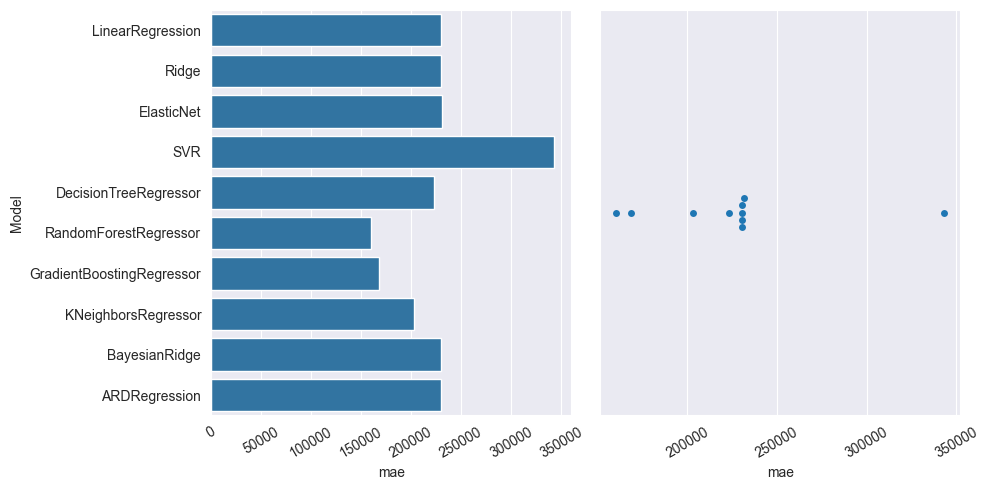

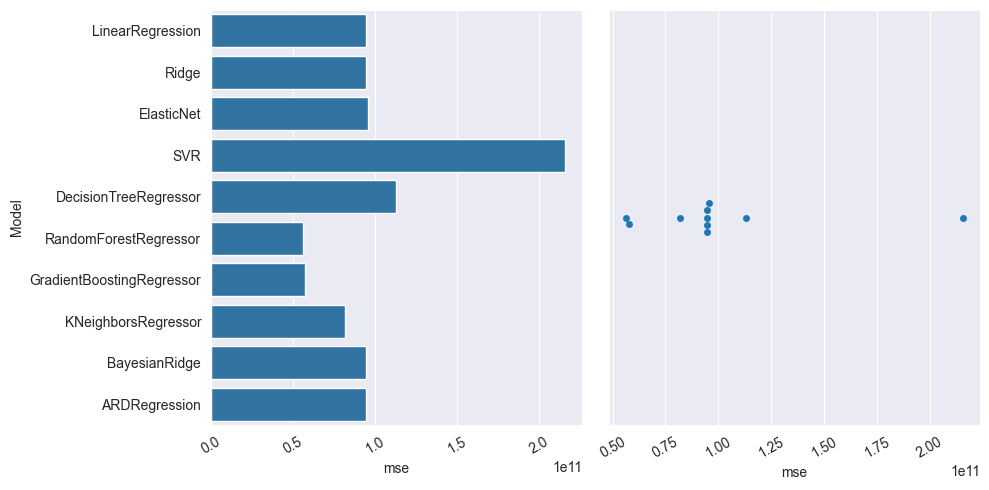

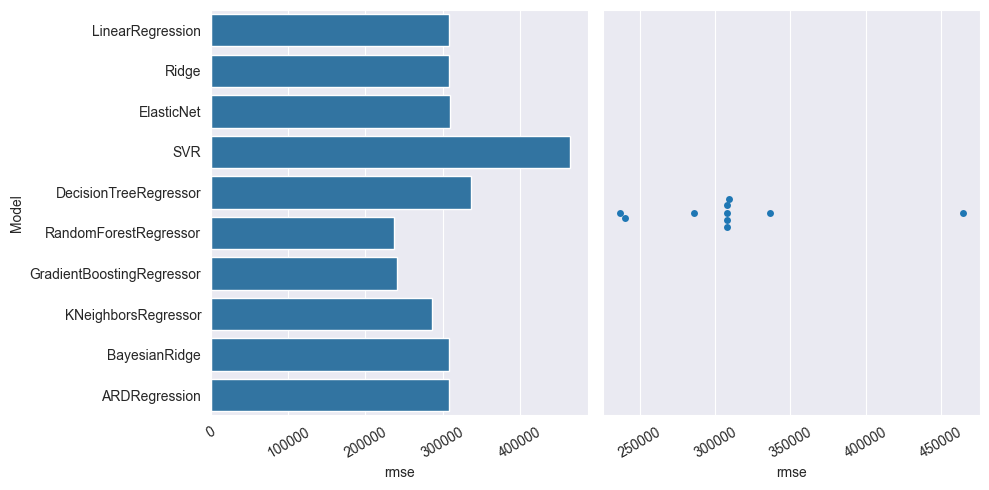

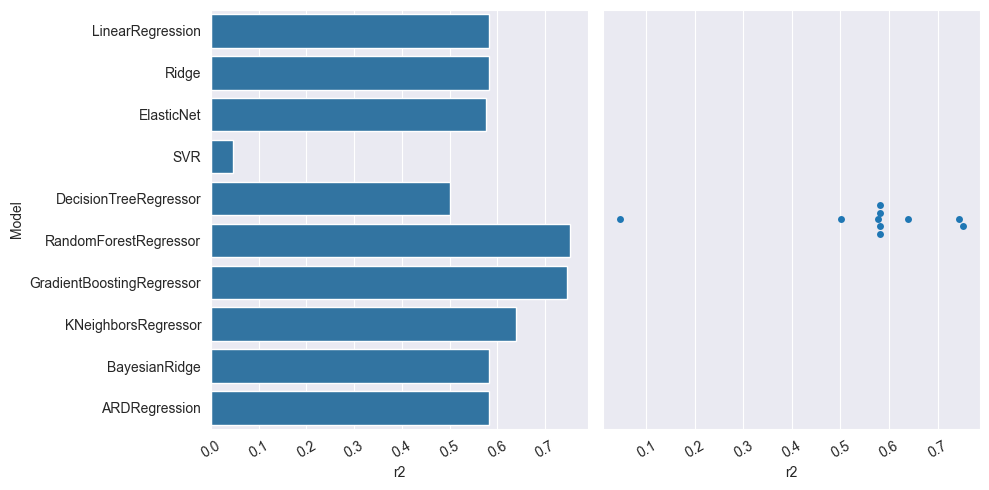

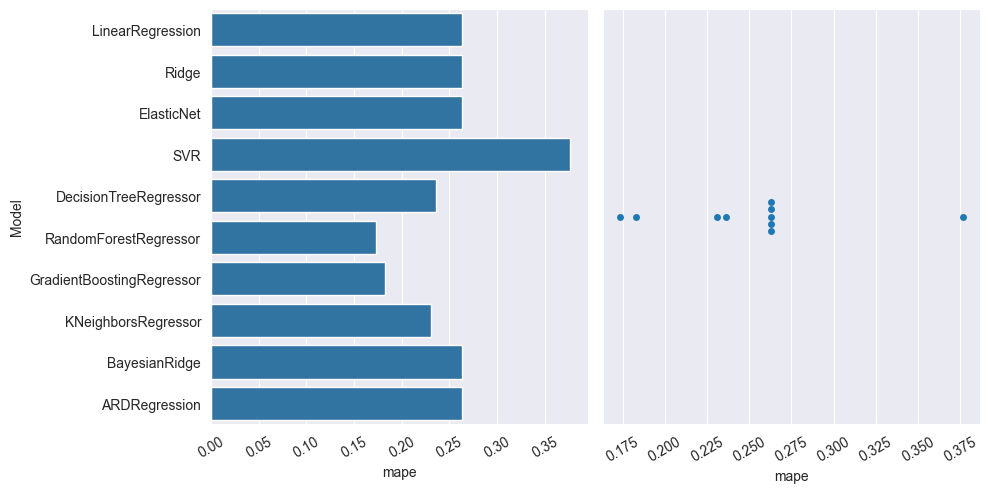

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in evaluation.columns:
    _, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.barplot(data=evaluation, x=column, y=evaluation.index, ax=axes[0])
    axes[0].tick_params(axis="x", labelrotation=30)
    sns.swarmplot(data=evaluation, x=column, ax=axes[1])
    axes[1].tick_params(axis="x", labelrotation=30)
    plt.tight_layout()
    plt.show()

In [14]:
eval_long = evaluation.reset_index().melt(id_vars="Model", value_vars=["mae", "rmse", "r2", "mape", "mse"],
                                          var_name="Metric", value_name="Score")
eval_long.head()

,Model,Metric,Score
0,LinearRegression,mae,230163.186431
1,Ridge,mae,230160.965856
2,ElasticNet,mae,231310.469715
3,SVR,mae,343179.219085
4,DecisionTreeRegressor,mae,223413.848922


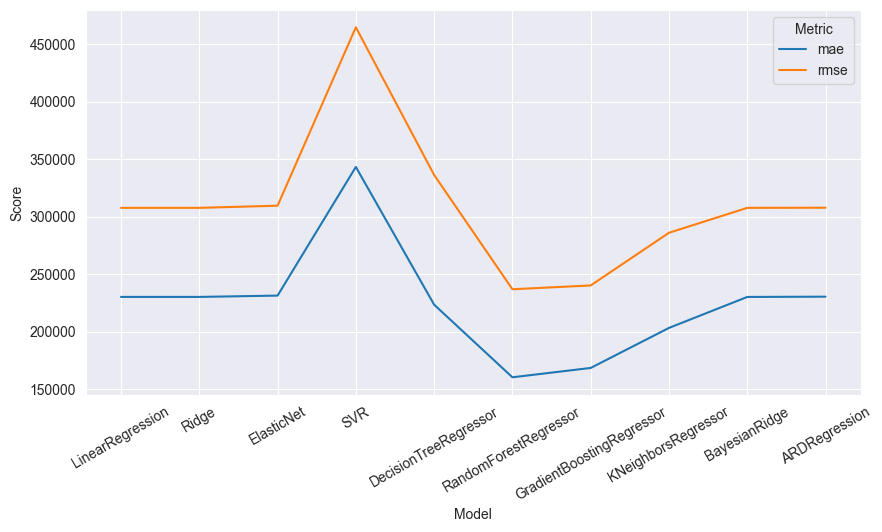

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["mae", "rmse"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=30)
plt.show()

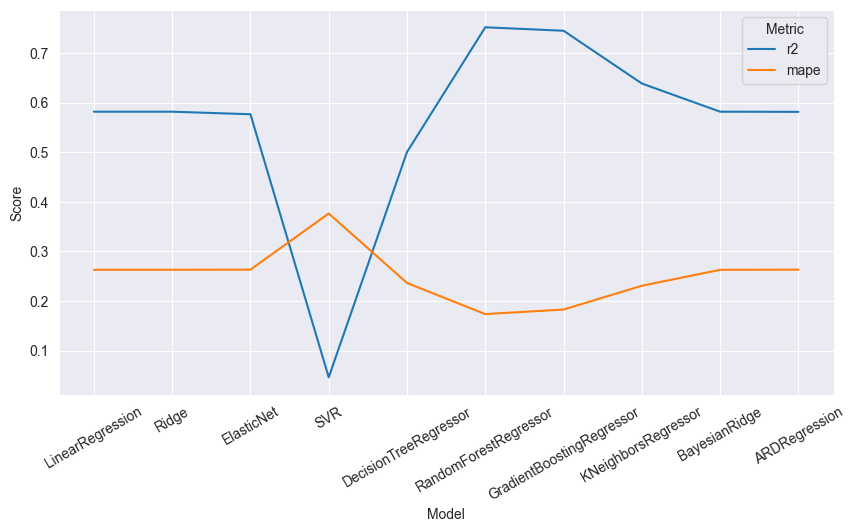

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["r2", "mape"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=30)
plt.show()

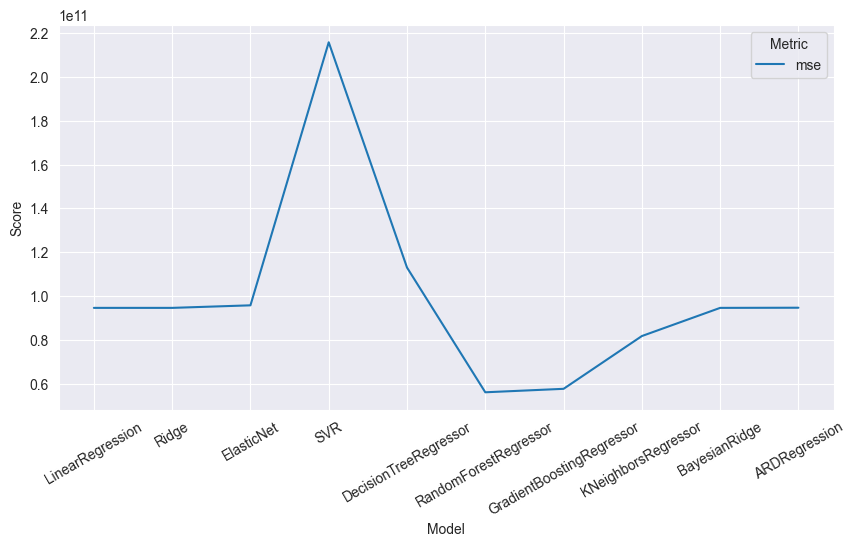

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["mse"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=30)
plt.show()